# 📈 Introduction to Options Markets

## Overview
This notebook provides an introduction to **options markets**, focusing on the key concepts and mechanics essential for understanding how options function in financial markets. We will cover the basics of options, their types, and how they are priced, along with key terminologies and formulas used in options trading.

## 📜 What is an Option?
An option is a **financial derivative** that gives the holder the right, but not the obligation, to buy or sell an underlying asset at a specified price, known as the **strike price**, before or at a specified expiration date.

There are two main types of options:

- **Call Option**: Gives the holder the right to buy the underlying asset at the strike price.
- **Put Option**: Gives the holder the right to sell the underlying asset at the strike price.

## 💡 Key Terminologies
- **Strike Price (K)**: The price at which the holder of the option can buy (call) or sell (put) the underlying asset.
- **Expiration Date**: The date at which the option expires. After this date, the option is no longer valid.
- **Premium**: The price paid by the buyer of the option to the seller for the rights conferred by the option.
- **In-the-Money (ITM)**: A call option is ITM when the current price of the underlying asset is above the strike price. A put option is ITM when the underlying asset's price is below the strike price.
- **Out-of-the-Money (OTM)**: A call option is OTM when the current price of the underlying asset is below the strike price. A put option is OTM when the asset price is above the strike price.

## 🧮 Payoff for Call and Put Options
### Call Option Payoff
The payoff from a call option depends on whether the option is exercised or not at expiration:

$$
\text{Payoff} = \max(S_T - K, 0)
$$

Where:
- $S_T$ is the price of the underlying asset at expiration.
- $K$ is the strike price.

### Put Option Payoff
The payoff from a put option is calculated as:

$$
\text{Payoff} = \max(K - S_T, 0)
$$

Where:
- $S_T$ is the price of the underlying asset at expiration.
- $K$ is the strike price.

## 🔑 Factors Affecting Option Pricing
Option prices are influenced by several factors, including:
- **Current price of the underlying asset (S)**.
- **Strike price (K)**.
- **Time to expiration (T)**.
- **Volatility of the underlying asset**.
- **Risk-free interest rate (r)**.
- **Dividends expected to be paid by the underlying asset**.

## 🧠 Black-Scholes Model (Brief Introduction)
One of the most widely used models to price options is the **Black-Scholes model**. For a European call option, the Black-Scholes formula is:

$$
C = S_0 N(d_1) - K e^{-rT} N(d_2)
$$

Where:
- $C$ is the price of the European call option.
- $S_0$ is the current price of the underlying asset.
- $K$ is the strike price.
- $r$ is the risk-free interest rate.
- $T$ is the time to maturity.
- $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.
- $d_1$ and $d_2$ are given by:

$$
d_1 = \frac{\ln(S_0 / K) + (r + \frac{1}{2} \sigma^2) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

Where $\sigma$ is the volatility of the underlying asset.

This model helps quantify the fair price of an option, factoring in the key variables of time, volatility, and the risk-free rate.

## Problems & Exercises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

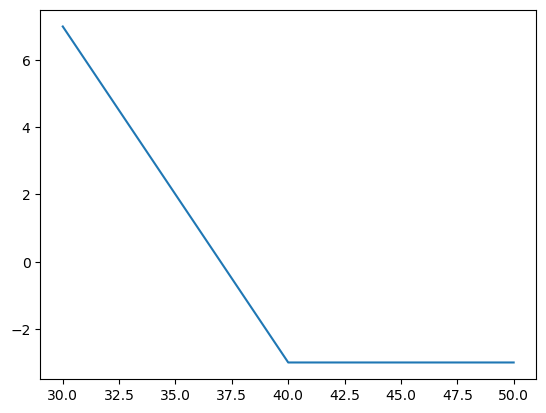

In [3]:
# 10.11
"""
Payoff of being long on an european put.
"""
price = 3 
spot = 42
strike = 40

# since spot > strike, the put won't be exercised
payoffs = [max(strike - i, 0) - price for i in range(30, 51)]
serie = pd.Series(payoffs, index=[i for i in range(30, 51)])
serie.plot()

<Axes: >

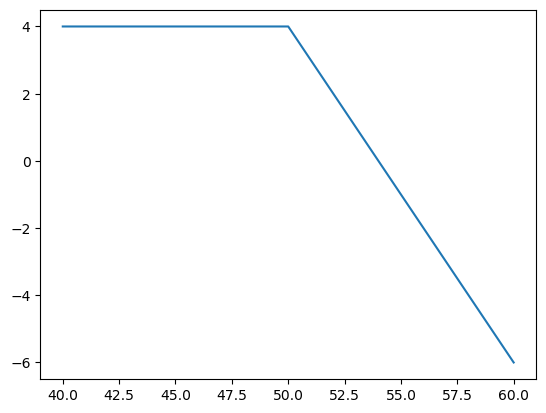

In [4]:
# 10.12 
"""
Payoff of being short on an european call.
"""
price = 4
spot = 47
strike = 50

# since spot < strike, the call won't be exercised
payoffs = [price - max(i - strike, 0) for i in range(40, 61)]
serie = pd.Series(payoffs, index=[i for i in range(40, 61)])
serie.plot()

<Axes: >

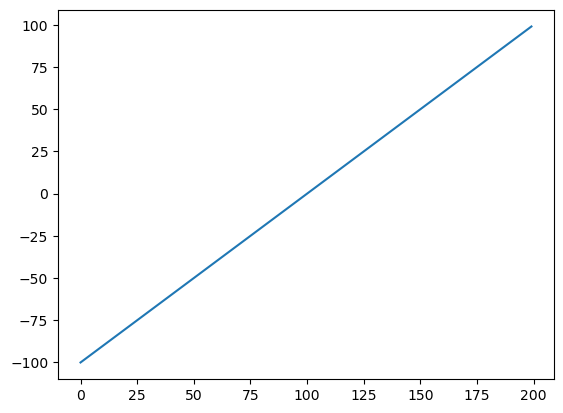

In [5]:
# 10.13 
"""
Short European call + long put.
"""
K = 100

call_payoff = [max(i - K, 0) for i in range(0, 200)]
put_payoff = [max(K - i, 0) for i in range(0, 200)]

payoff = [call_payoff[i] - put_payoff[i] for i in range(0, 200)]
serie = pd.Series(payoff, index=[i for i in range(0, 200)])
serie.plot()

<Axes: >

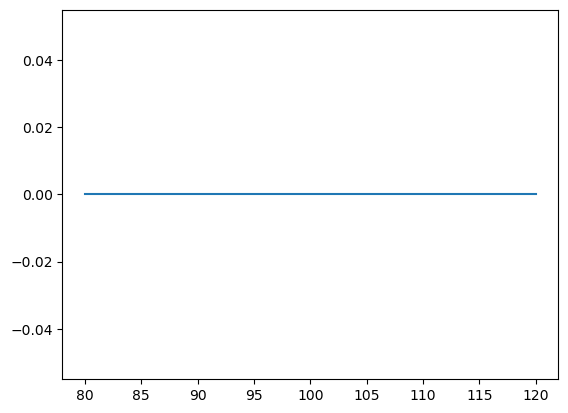

In [6]:
# 10.18
"""
Proving that european call and put have the same value if strike = forward price. 
=> Call Put parity.
"""
# Simulating market parameters
spot = 100  # Let the underlying spot be 100€ 
rf = 0.1

forward_price = spot * (1 + rf)
strike = forward_price

# We create a portfolio of a long forward and a long put. 
forward_payoff = [i - forward_price for i in range(80, 121)]
put_payoff = [max(strike - i, 0) for i in range(80, 121)]
portfolio_payoff = np.add(forward_payoff, put_payoff)

# We compare with a call
call_payoff = [max(i - strike, 0) for i in range(80, 121)]
spread = np.add(portfolio_payoff, -np.array(call_payoff))

# Spread should then be equal to 0
serie = pd.Series(spread, index=[i for i in range(80, 121)])
serie.plot()